   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

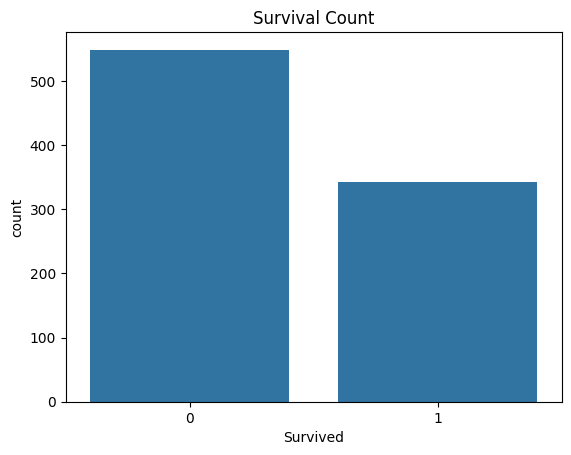

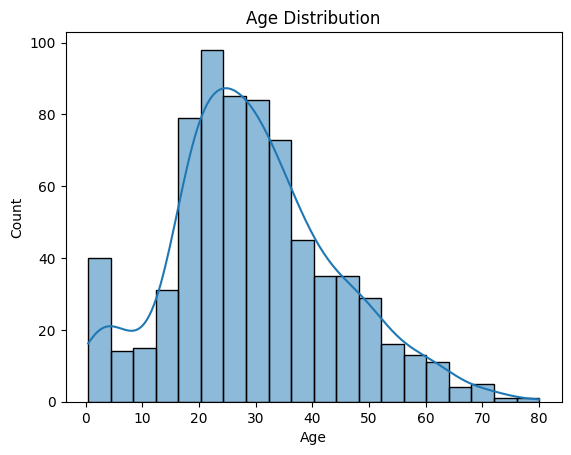

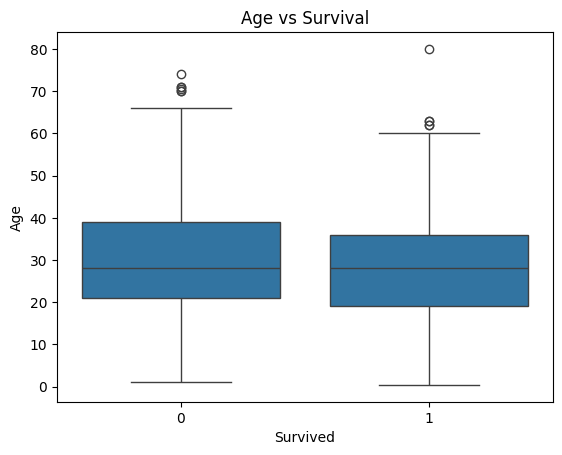

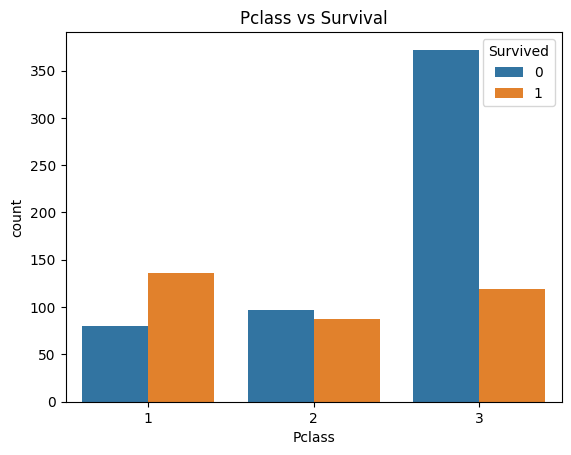

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1-Score: 0.7552447552447552
ROC-AUC: 0.8818532818532818

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



C:\Users\ak193\AppData\Local\Temp\ipykernel_29488\2595044146.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\ak193\AppData\Local\Temp\ipykernel_29488\2595044146.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

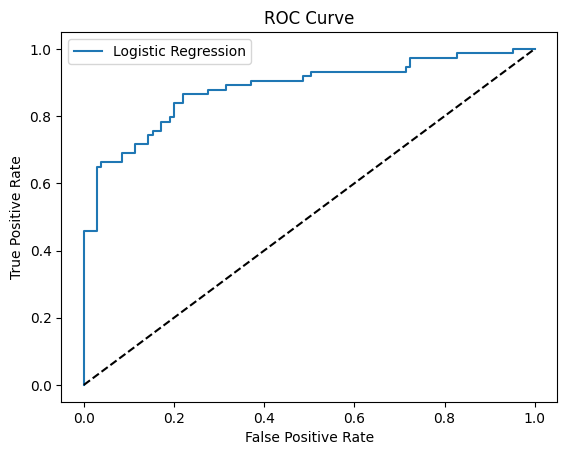

    Feature  Coefficient
5      Fare     0.121214
4     Parch    -0.100018
6  Embarked    -0.174770
3     SibSp    -0.328189
2       Age    -0.395757
0    Pclass    -0.792517
1       Sex    -1.285813
✅ Model and Scaler saved as model.pkl


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, roc_curve
)
import pickle

# ------------------------------
# Load datasets (same folder)
# ------------------------------
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

print(train_df.head())
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())

# ------------------------------
# Exploratory Data Analysis
# ------------------------------
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()

sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Age vs Survival")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Pclass vs Survival")
plt.show()

# ------------------------------
# Data Preprocessing
# ------------------------------
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Label Encoding
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_df[col] = label_enc.fit_transform(train_df[col])
    test_df[col] = label_enc.transform(test_df[col])

# Features & Target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_df[features])

# ------------------------------
# Model Training
# ------------------------------
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# ------------------------------
# Evaluation
# ------------------------------
y_pred = log_reg.predict(X_val)
y_prob = log_reg.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': log_reg.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

# ------------------------------
# Save model + scaler
# ------------------------------
with open("model.pkl", "wb") as f:
    pickle.dump({"model": log_reg, "scaler": scaler}, f)

print("✅ Model and Scaler saved as model.pkl")
